In [1]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [2]:
%cd MyDrive/My\ Drive/ECoG

/content/MyDrive/My Drive/ECoG


In [3]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import ECoG
import pywt
import time
import pandas as pd
import math

In [4]:
x,y = ECoG.read_ECoG_from_csv("ECoG.csv", "Motion.csv")
data = ECoG.ECoG(x, y, downsample = False)

In [5]:
X = data.signal 
y = data.motion 
t = data.time

In [6]:
X.shape, t.shape

((1258379, 32), (1258379,))

In [ ]:
for el in range(data.signal.shape[1]):
    plt.figure(figsize=(14,5))
    plt.plot(data.time[::10000],data.signal[::10000, el])
    plt.title("Electrode "+str(el))
    plt.xlabel("time")
    plt.ylabel("voltage")
    plt.show()

In [11]:
import seaborn as sns

In [16]:
def abs_morlet(M,w = 0.5,s = 0.1):
    return np.abs(scipy.signal.morlet(M,w = 0.5,s = 0.1))

freqs = np.linspace(1,14.5,12)

scalo1 = pywt.cwt(data.signal[25000:65000:100, 1], wavelet='morl', scales=freqs)[0]

In [17]:
scalo1.shape

(12, 400)

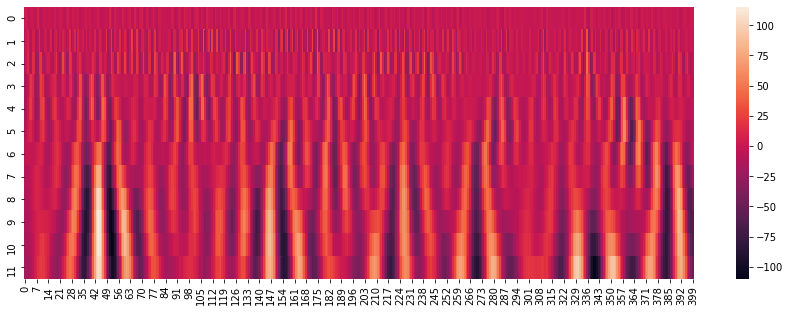

In [ ]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.heatmap(scalo)

In [126]:
def make_scalogram(data,freq,window_size):
    N = 10 ## used to save memory
    data = rolling_window(data,window_size)
    n_steps = math.ceil(data.shape[0] / N)
    X = []
    for i in range(n_steps):
        res_ = pywt.cwt(data=data[i * N: (i+1) * N] , wavelet='morl', scales=freq, axis=1)[0] 
        #if config["sqr_signal"]:
        res_=res_.transpose((1,3,0,2))[:,:,:,::10] **2
        #else:
        #    res_=np.abs(res_.transpose((1,3,0,2))[:,:,:,::10])
        X.append(res_)
    return np.concatenate(X,axis=0)

def rolling_window(a, window_size):
    shape = (a.shape[0] - window_size, window_size) + a.shape[1:]
    strides = (a.strides[0],) + a.strides
    print(shape,strides)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

freq = np.linspace(1,15,15)
scalo = make_scalogram(data.signal[25000:65000:100],freq,100)

(300, 100, 32) (26400, 26400, 8)


In [127]:
scalo[:,1,:, 0].T.shape

(15, 300)

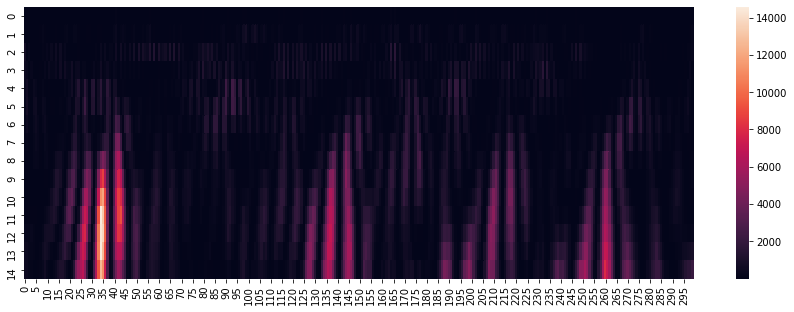

In [128]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.heatmap(scalo[:,1,:, 1].T)

In [ ]:
frequencies, times, spectrogram = scipy.signal.spectrogram(data.signal[25000:65000:100, 0], 100,nperseg=100,noverlap=99,nfft = 128,mode='magnitude')

In [ ]:
scalo.shape, data.time[25000:65000:100].shape

((12, 400), (400,))

In [ ]:
spectrogram.shape, data.time[25000:65000:100].shape

((65, 301), (400,))

In [ ]:
data.time.shape

(1258379,)

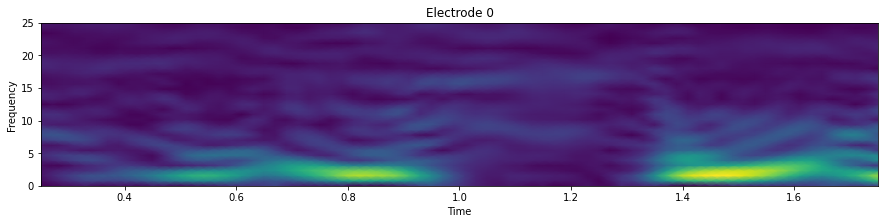

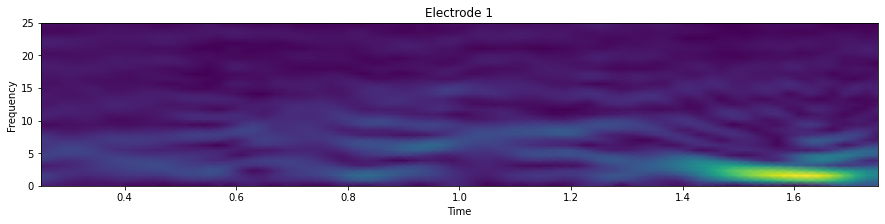

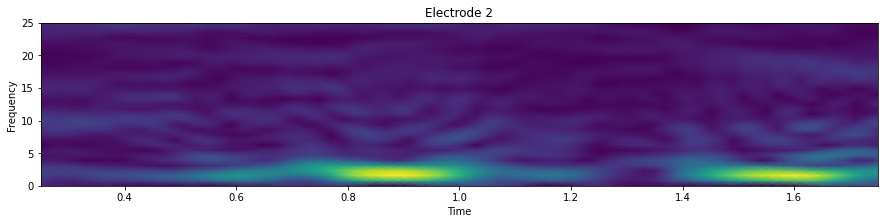

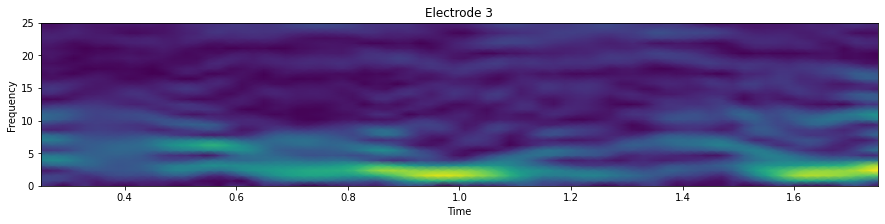

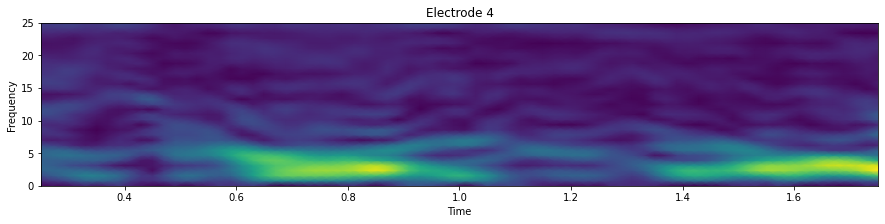

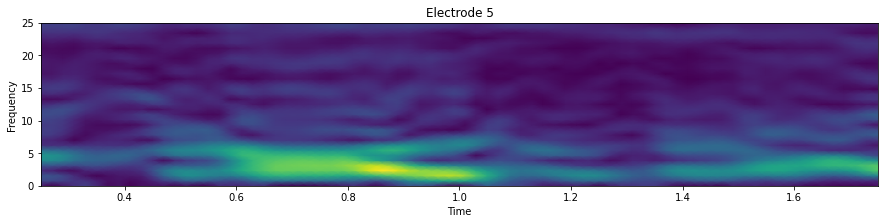

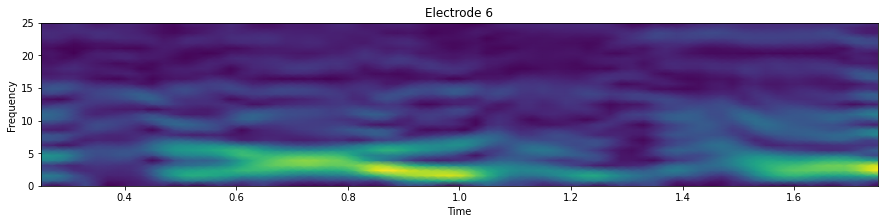

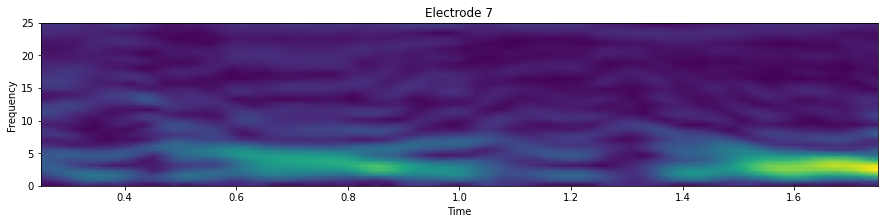

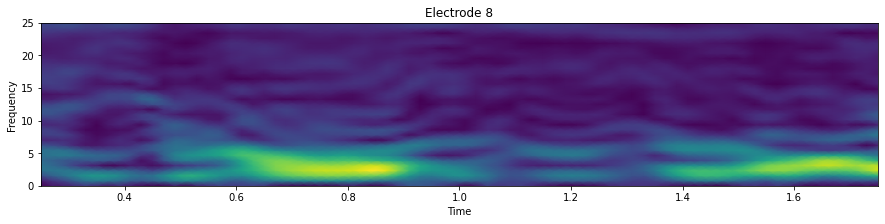

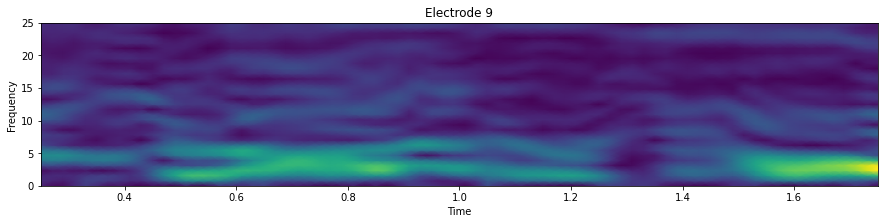

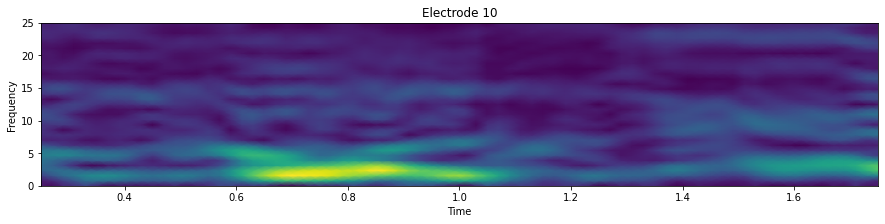

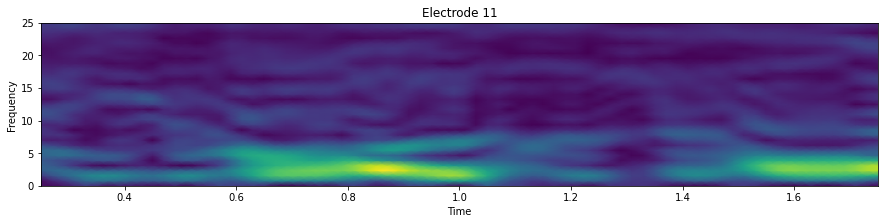

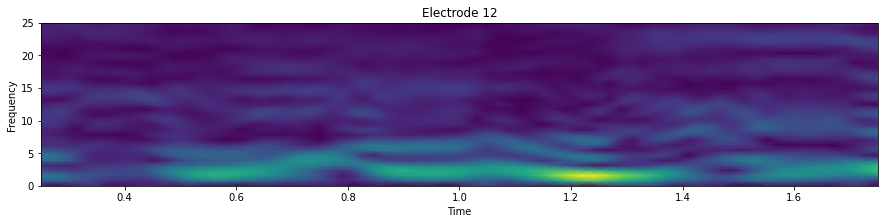

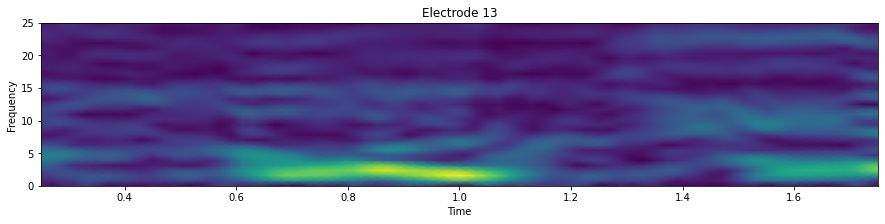

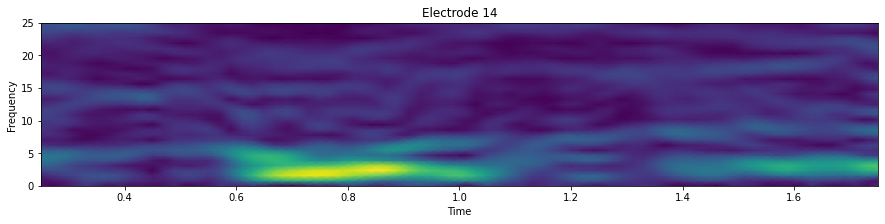

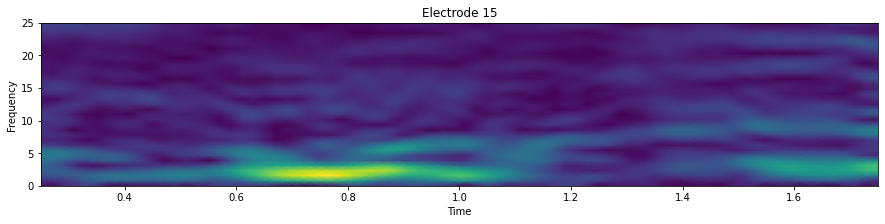

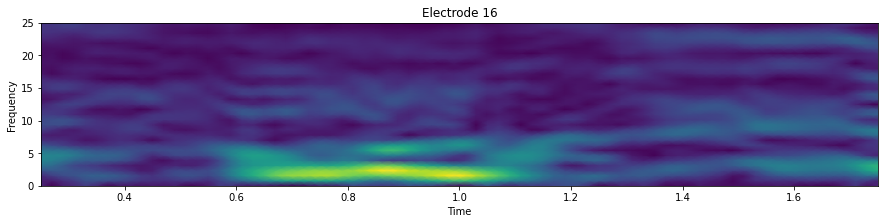

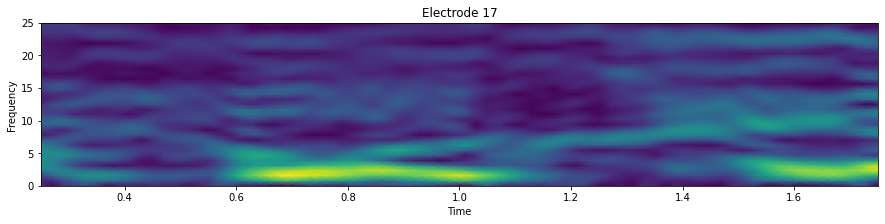

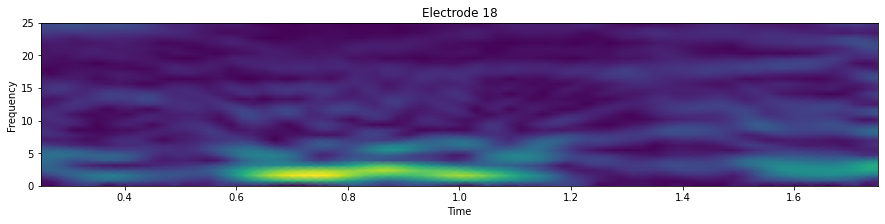

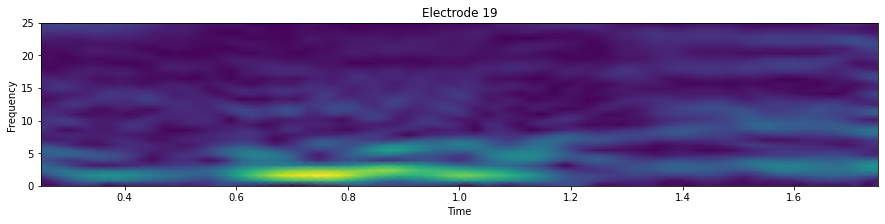

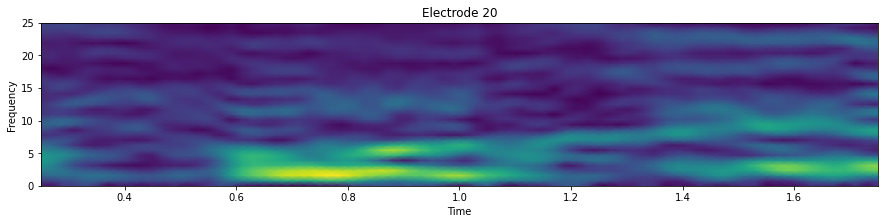

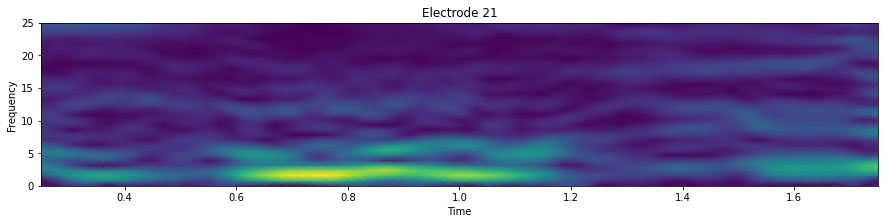

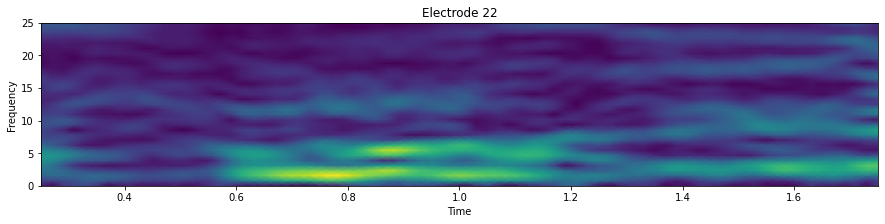

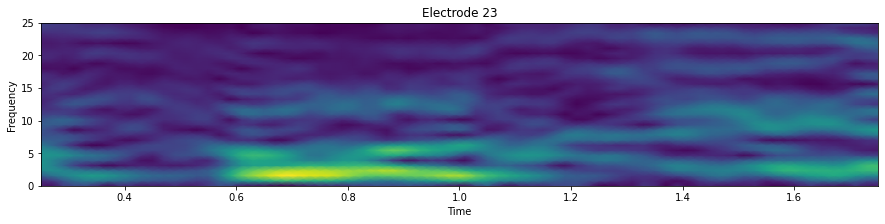

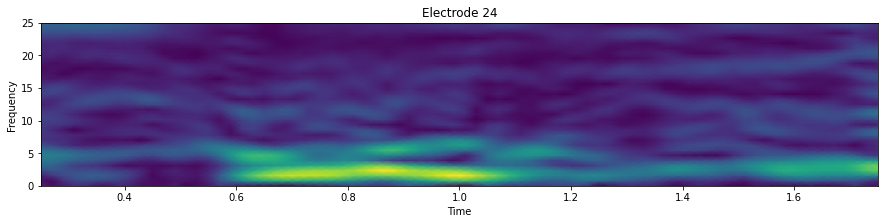

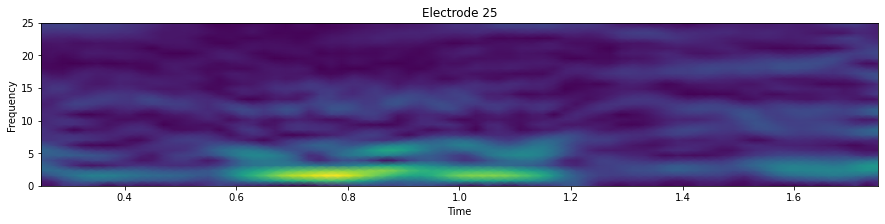

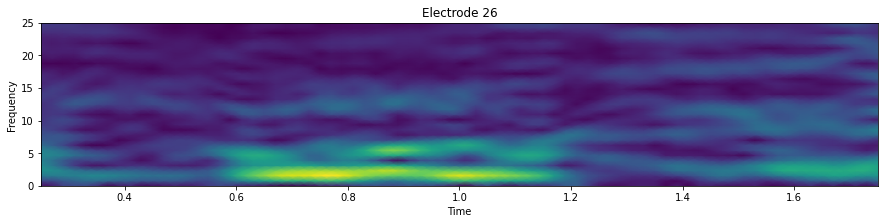

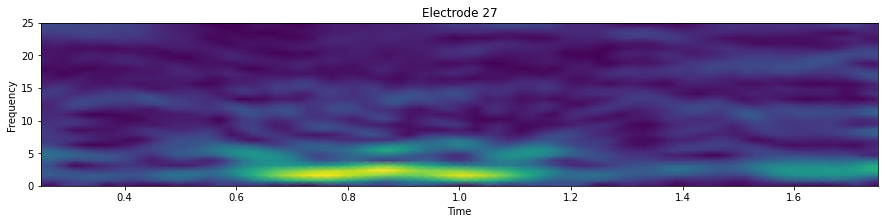

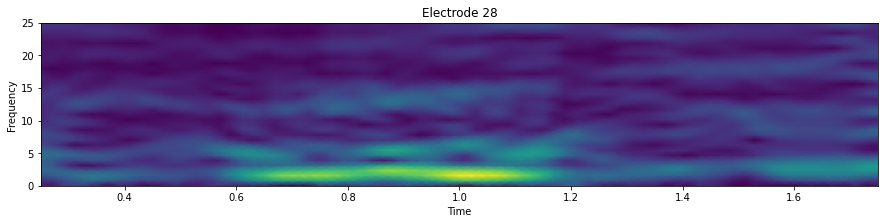

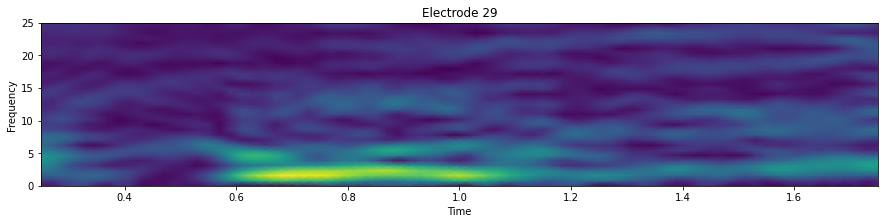

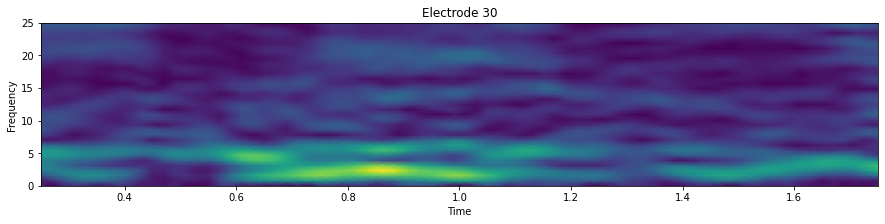

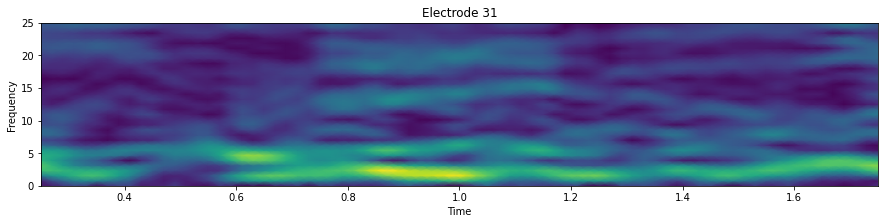

In [161]:
for i in range(32):
  f = plt.figure(figsize=(15, 3))
  frequencies, times, spectrogram = scipy.signal.spectrogram(data.signal[25000:30000:50,i], 50,nperseg=25,noverlap=24,nfft = 64,mode='magnitude')
  plt.pcolormesh(times, frequencies, spectrogram, shading='gouraud')
  plt.title(f'Electrode {i}')
  plt.ylabel('Frequency')
  plt.xlabel('Time')
  #plt.savefig(f'spectr{i}.png')
  plt.show()

In [173]:
np.array(spectrs).shape

(32, 89)

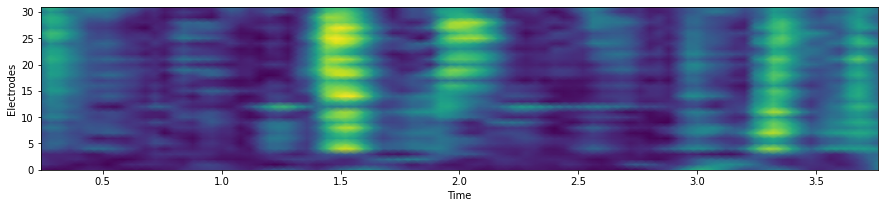

In [201]:
spectrs = []
f = plt.figure(figsize=(15, 3))
for i in range(32):
  frequencies, times, spectrogram = scipy.signal.spectrogram(data.signal[25000:30000:50,i], 25,nperseg=12,noverlap=11,nfft = 32,mode='magnitude')
  spectrs.append(spectrogram[1])
spectrs = np.array(spectrs)
plt.pcolormesh(times, list(range(32)), spectrs, shading='gouraud')
plt.ylabel('Electrodes')
plt.xlabel('Time')
plt.savefig('electrodes_spectr.png')
plt.show()

In [163]:
spectrogram.shape, frequencies.shape

((33, 76), (33,))

Text(34.57500000000002, 0.5, 'V')

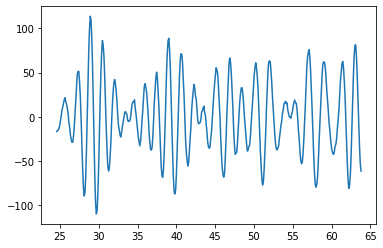

In [ ]:
#ax4 = sns.heatmap(scalo, cbar=False)
plt.plot(data.time[25000:65000:100],scalo[10])
ax5.set_xlabel('t, sec')
ax5.set_ylabel('V')

In [105]:
data.time[25000:65000:133].shape

(301,)

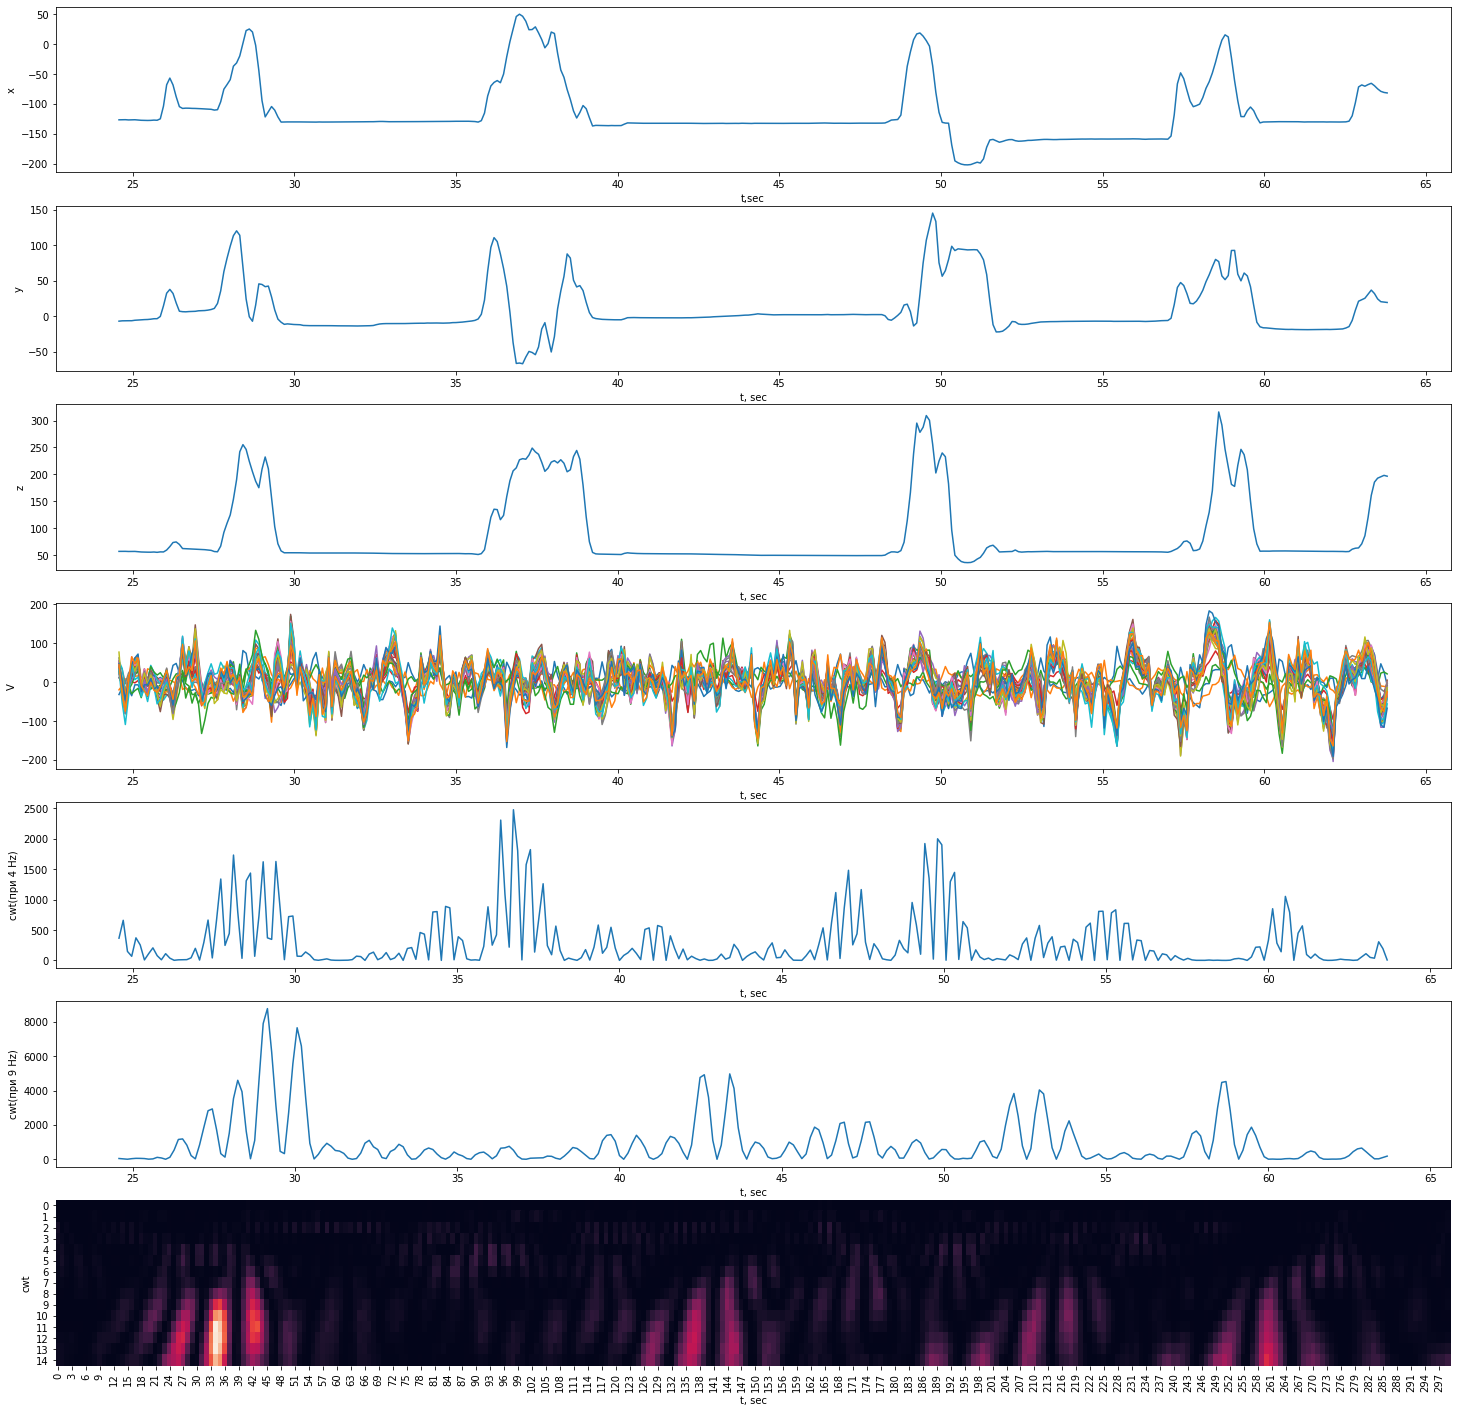

In [139]:
fig ,(ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7,1,figsize=(25,25))
ax1.plot(data.time[25000:65000:100],data.motion[25000:65000:100,0])
ax1.set_xlabel('t,sec')
ax1.set_ylabel('x')

ax2.plot(data.time[25000:65000:100],data.motion[25000:65000:100,1])
ax2.set_xlabel('t, sec')
ax2.set_ylabel('y')

ax3.plot(data.time[25000:65000:100],data.motion[25000:65000:100,2])
ax3.set_xlabel('t, sec')
ax3.set_ylabel('z')

ax4.plot(data.time[25000:65000:100],data.signal[25000:65000:100])
ax4.set_xlabel('t, sec')
ax4.set_ylabel('V')

ax5.plot(data.time[25000:65000:133][:-1],scalo[:,1,4,1].T)
ax5.set_xlabel('t, sec')
ax5.set_ylabel('cwt(при 4 Hz)')

ax6.plot(data.time[25000:65000:133][:-1],scalo[:,1,9,1].T)
ax6.set_xlabel('t, sec')
ax6.set_ylabel('cwt(при 9 Hz)')

ax7 = sns.heatmap(scalo[:,1,:,1].T , cbar=False)
#ax4.plot(data.time[15000:55000:100],scalo[10])
ax7.set_xlabel('t, sec')
ax7.set_ylabel('cwt')
fig.show()

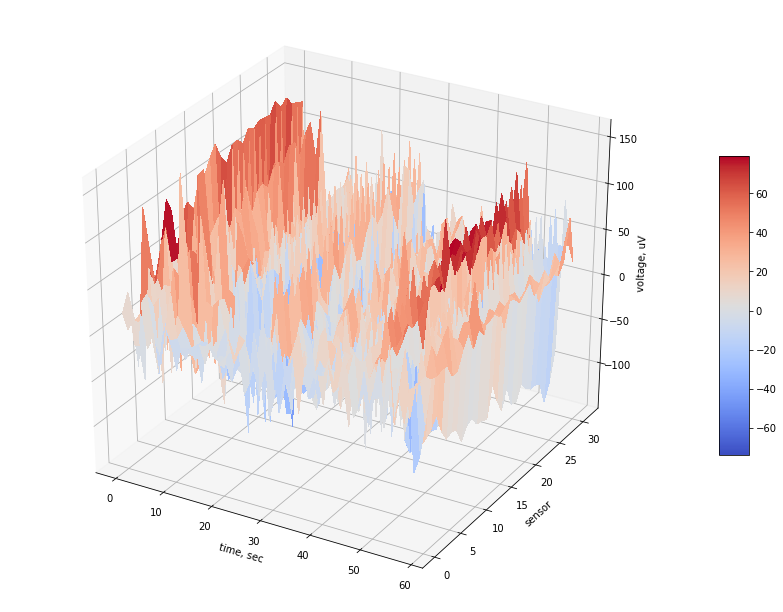

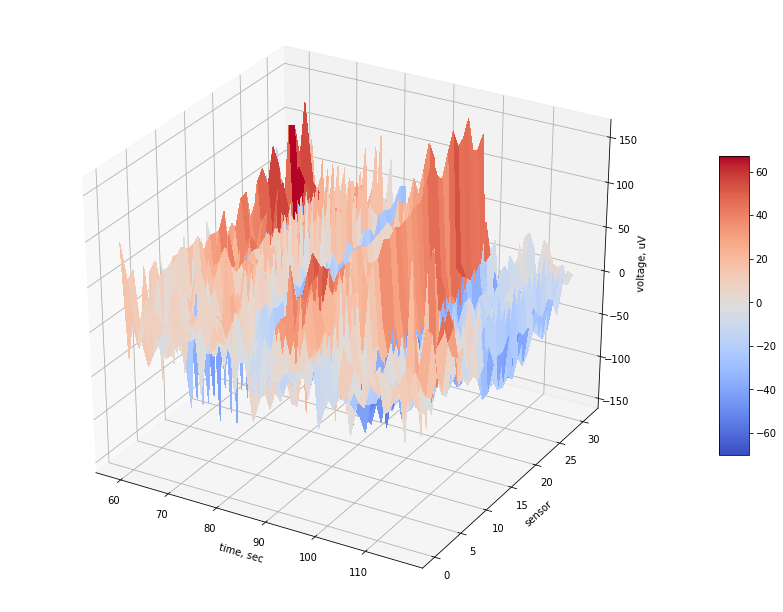

In [70]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(15, 11))
ax = fig.gca(projection='3d')

# Make data.
Y = np.arange(0, 32, 1)
X = data.time[:60000:1000]
X, Y = np.meshgrid(X, Y)
Z = data.signal[:60000:1000].T

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_xlabel('time, sec')
ax.set_ylabel('sensor')
ax.set_zlabel('voltage, uV')
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

fig = plt.figure(figsize=(15, 11))
ax = fig.gca(projection='3d')

# Make data.
Y = np.arange(0, 32, 1)
X = data.time[60000:120000:1000]
X, Y = np.meshgrid(X, Y)
Z = data.signal[60000:120000:1000].T

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_xlabel('time, sec')
ax.set_ylabel('sensor')
ax.set_zlabel('voltage, uV')
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

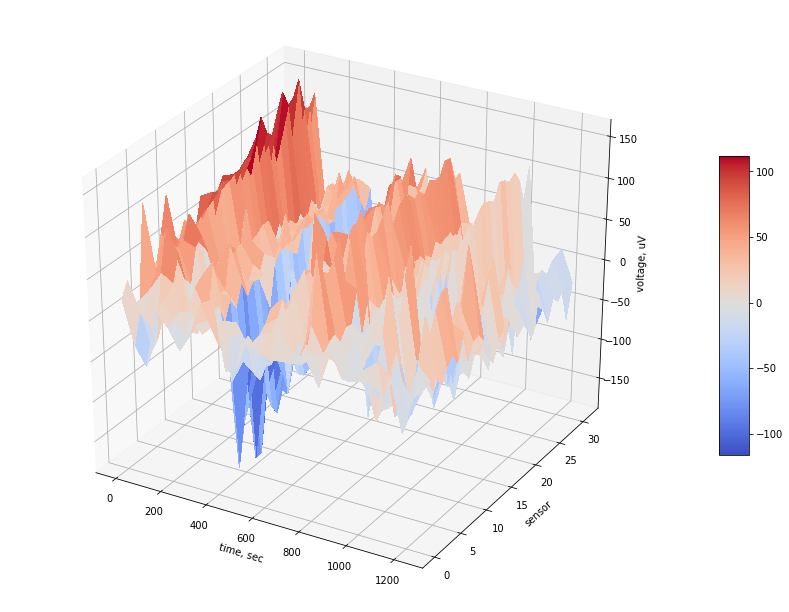

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(15, 11))
ax = fig.gca(projection='3d')

# Make data.
Y = np.arange(0, 32, 1)
X = data.time[::50000]
X, Y = np.meshgrid(X, Y)
Z = data.signal[::50000].T

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_xlabel('time, sec')
ax.set_ylabel('sensor')
ax.set_zlabel('voltage, uV')
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

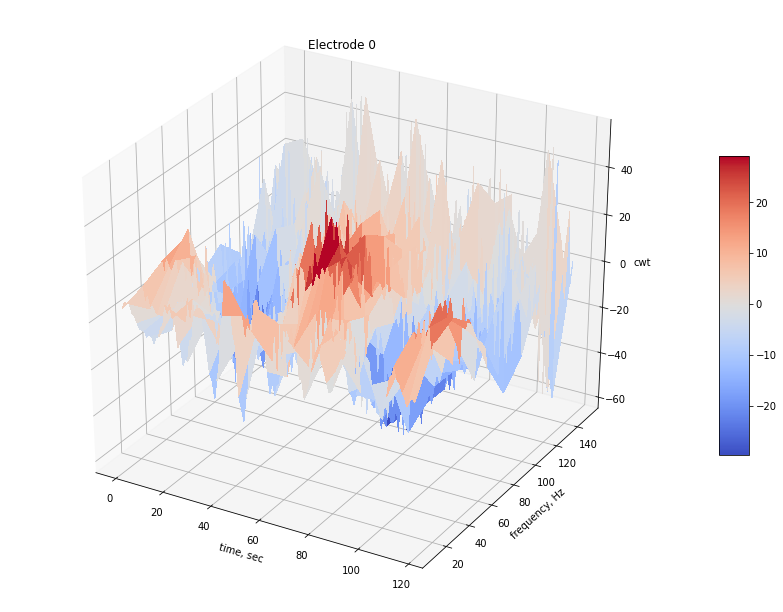

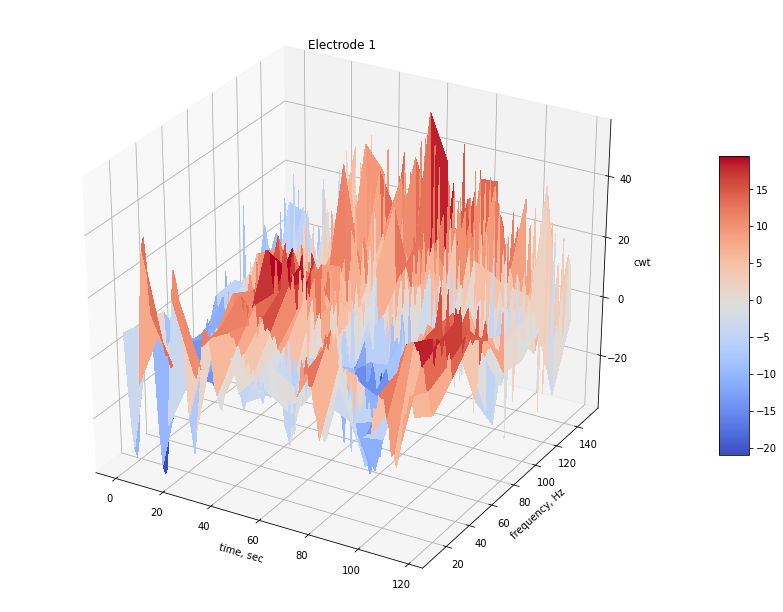

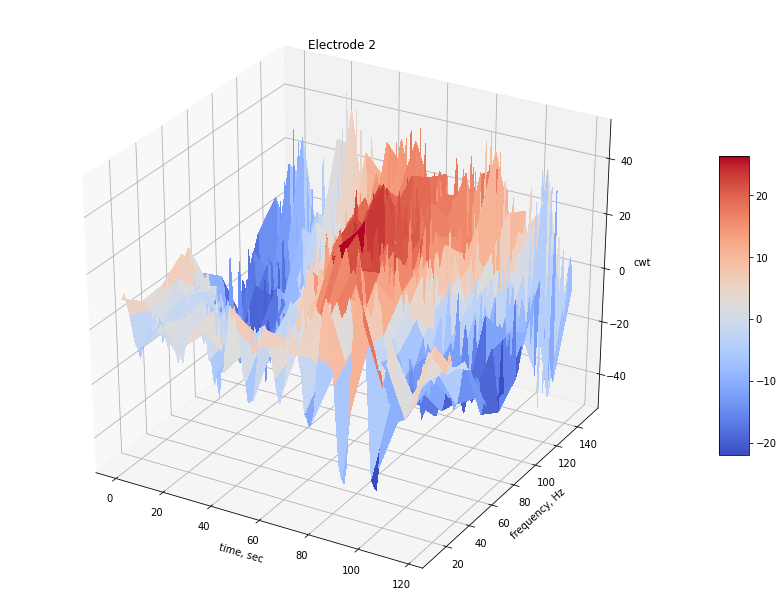

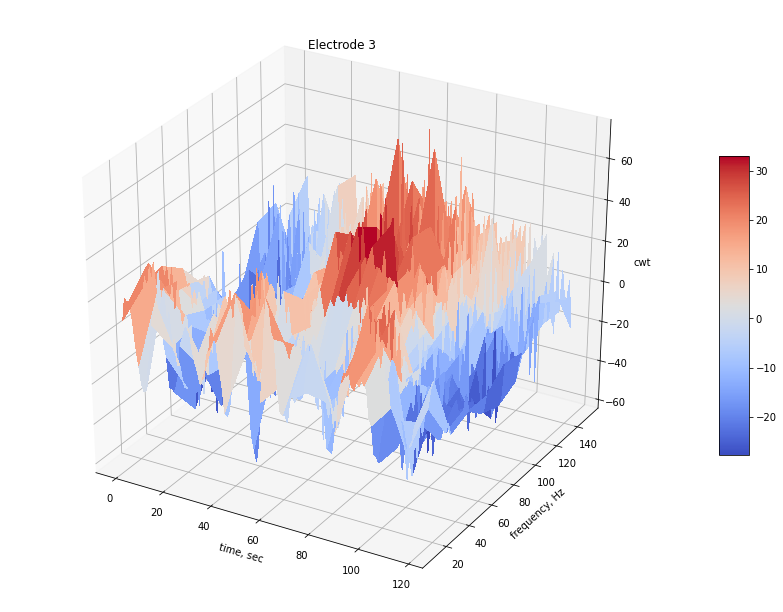

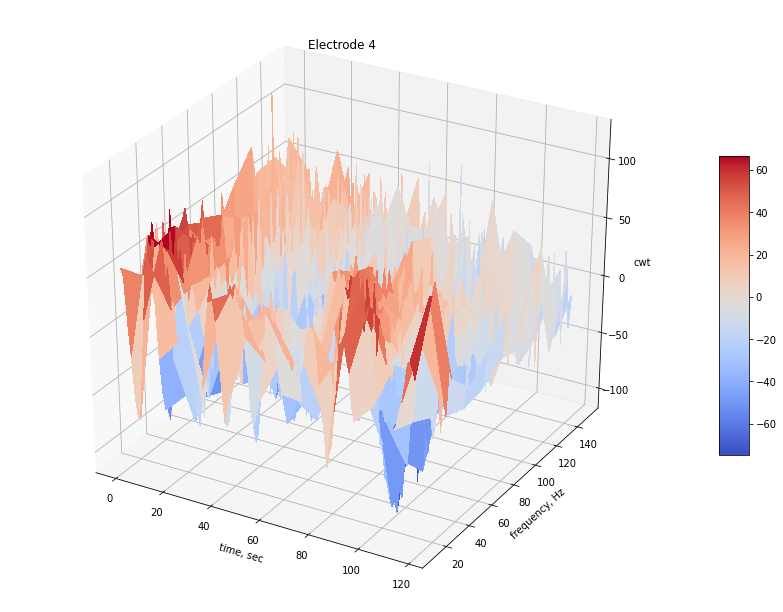

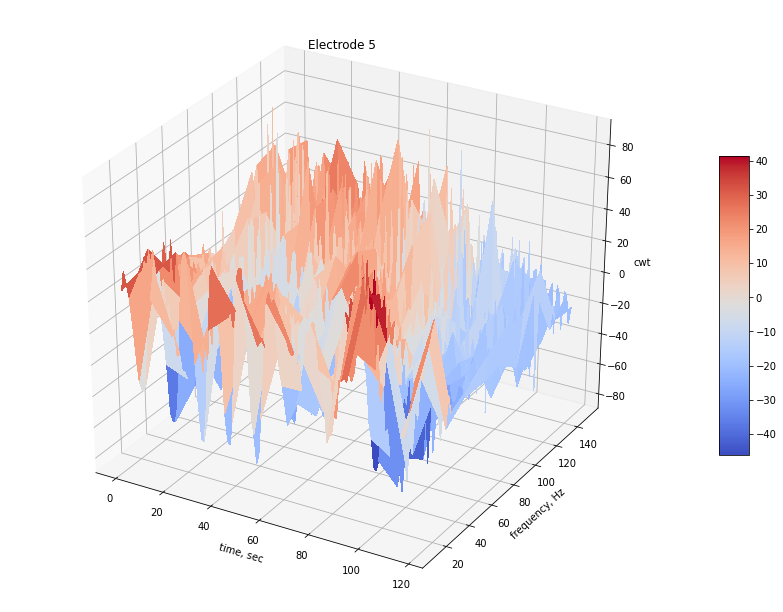

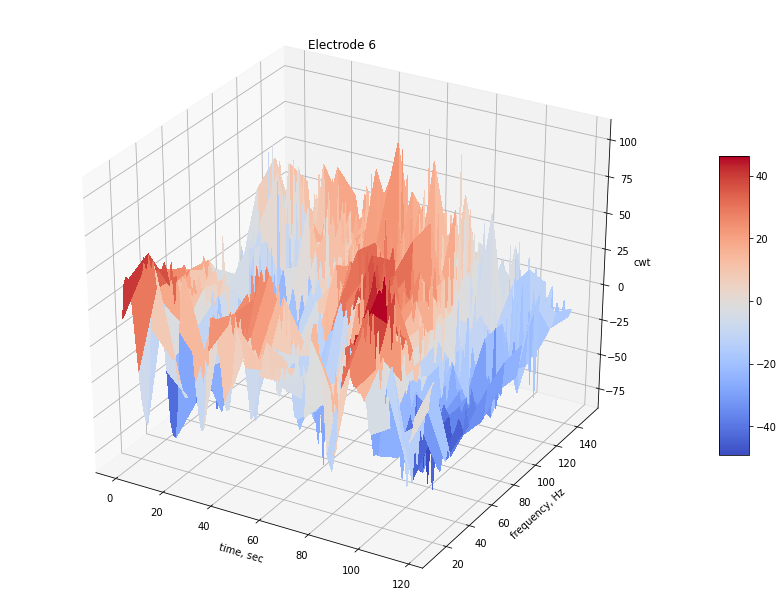

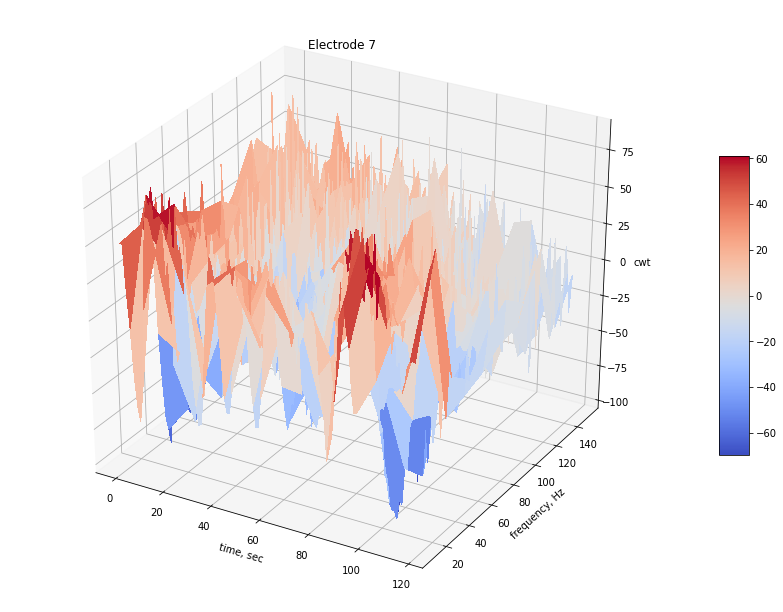

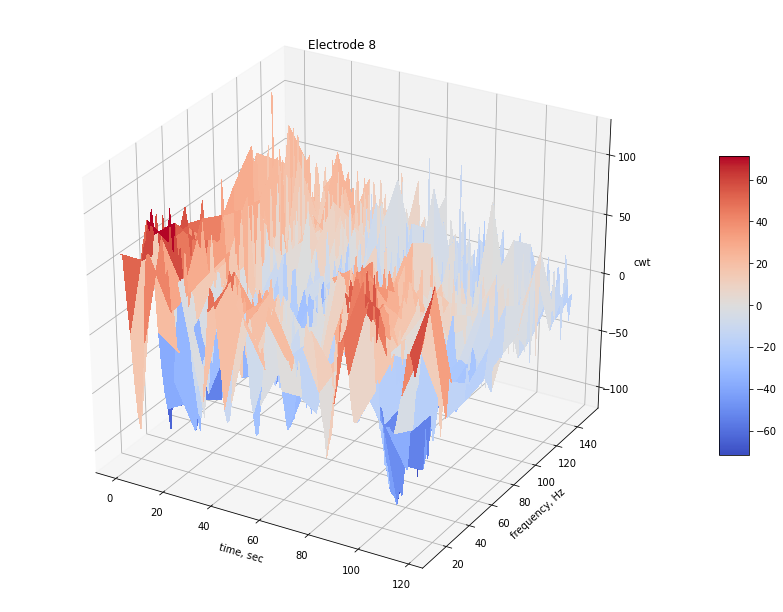

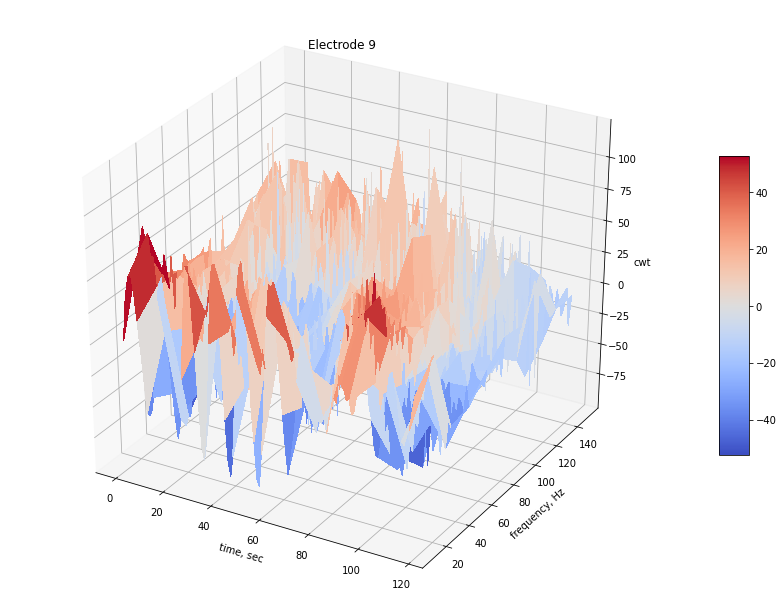

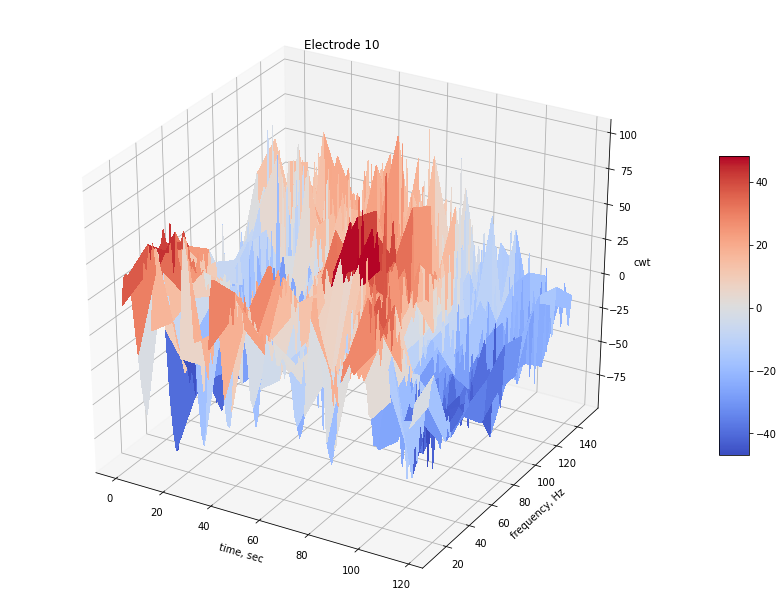

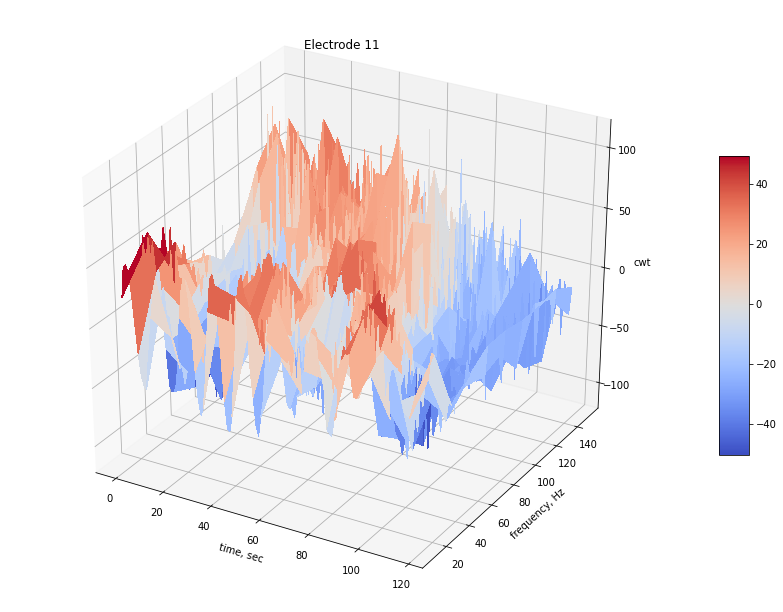

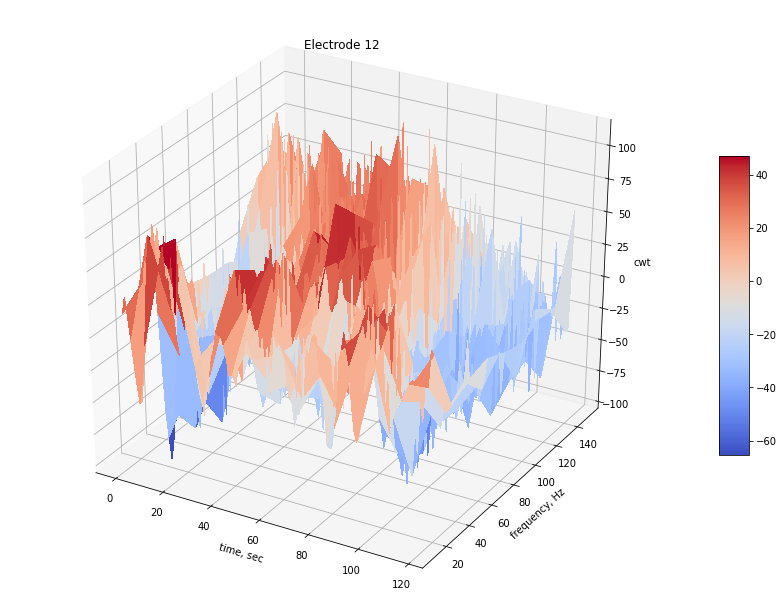

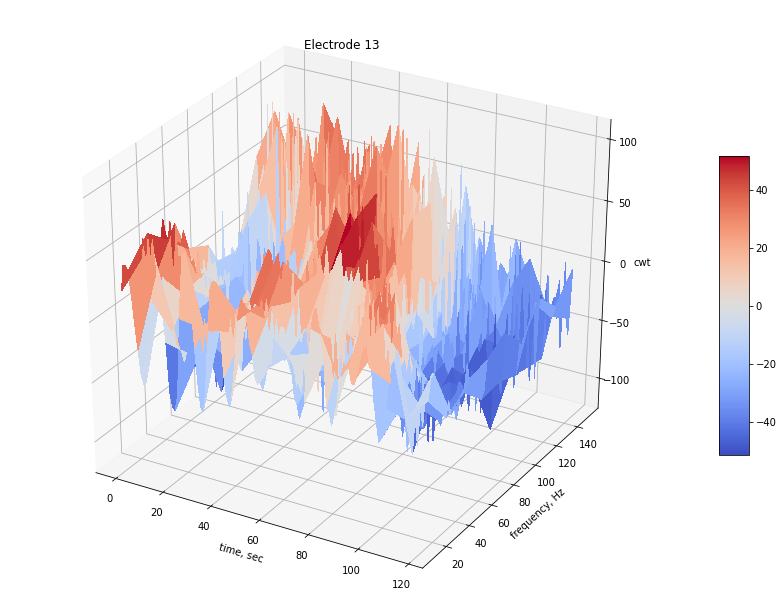

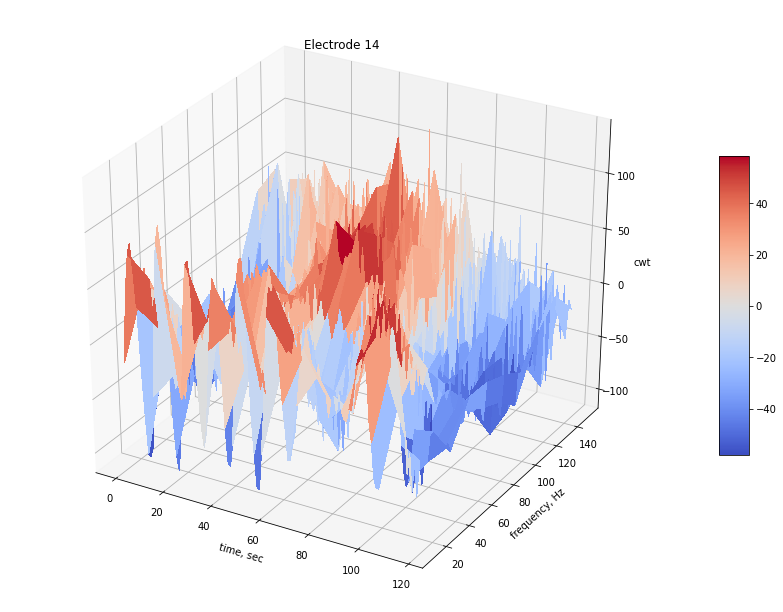

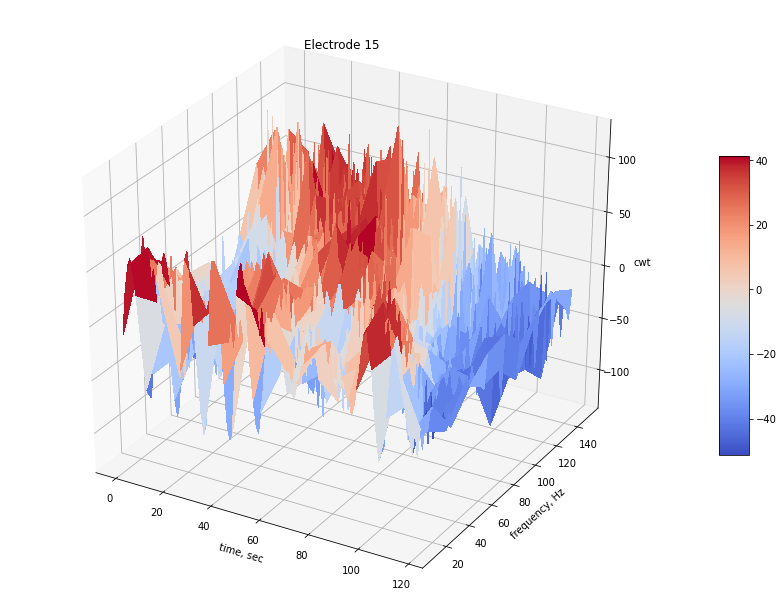

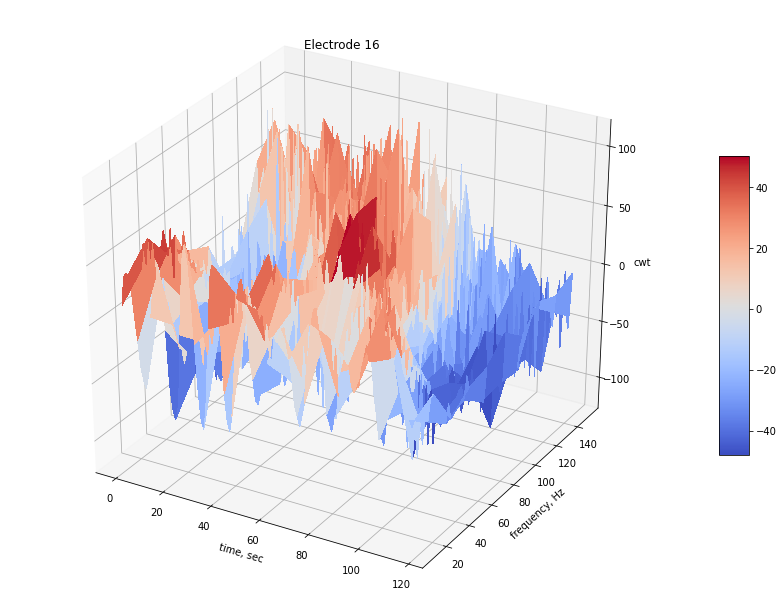

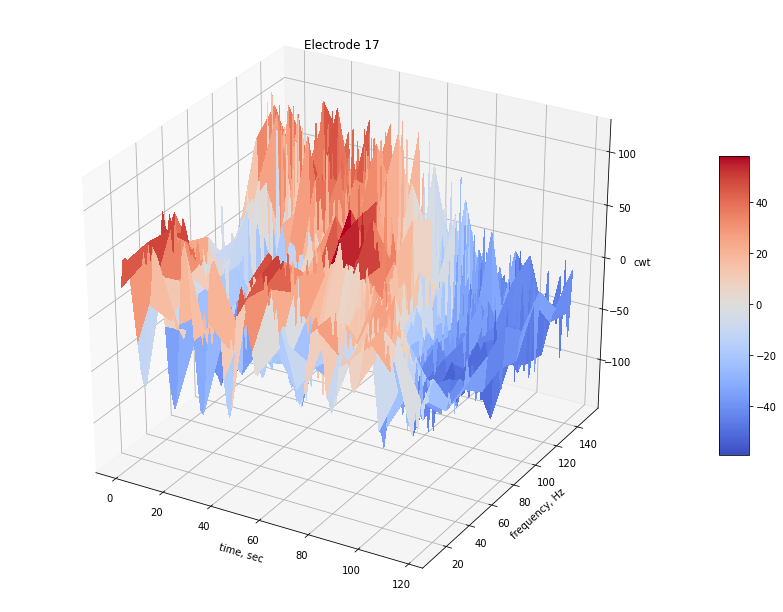

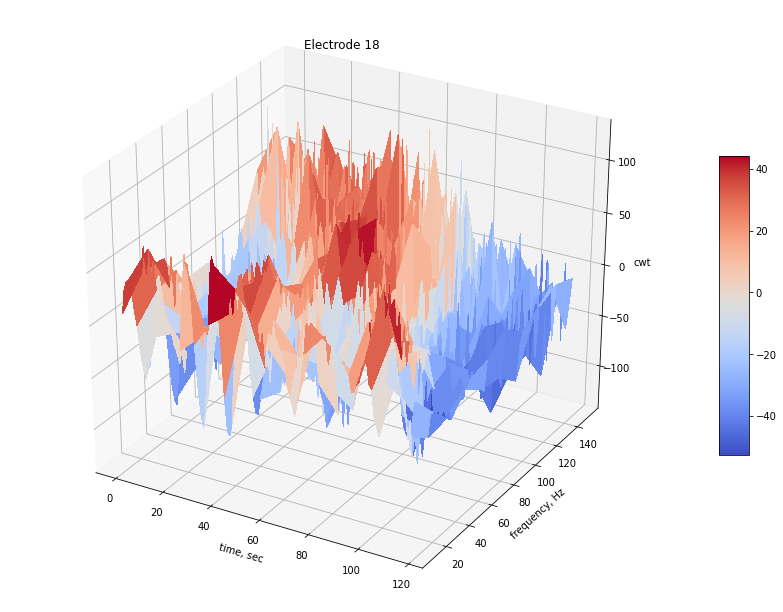

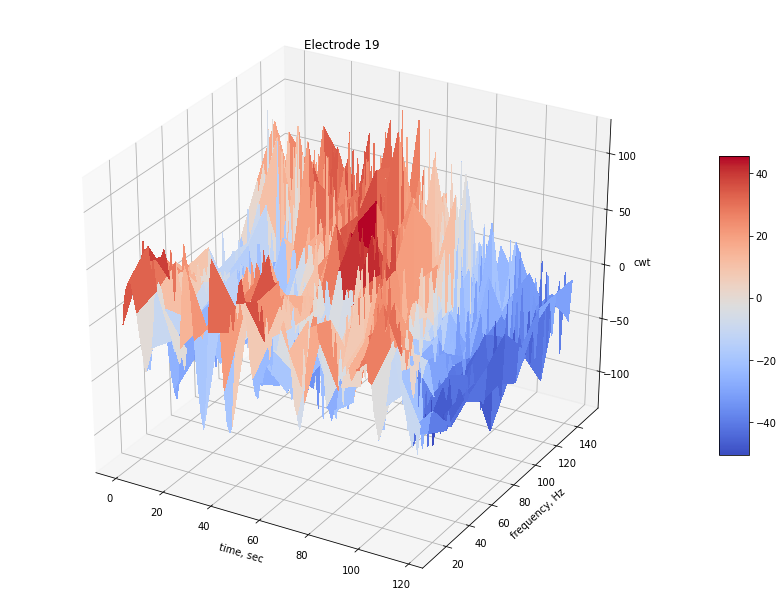

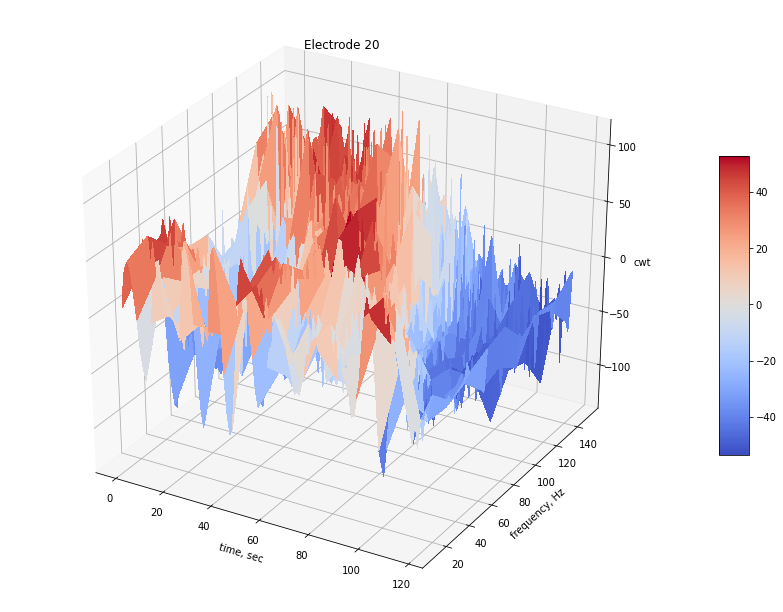

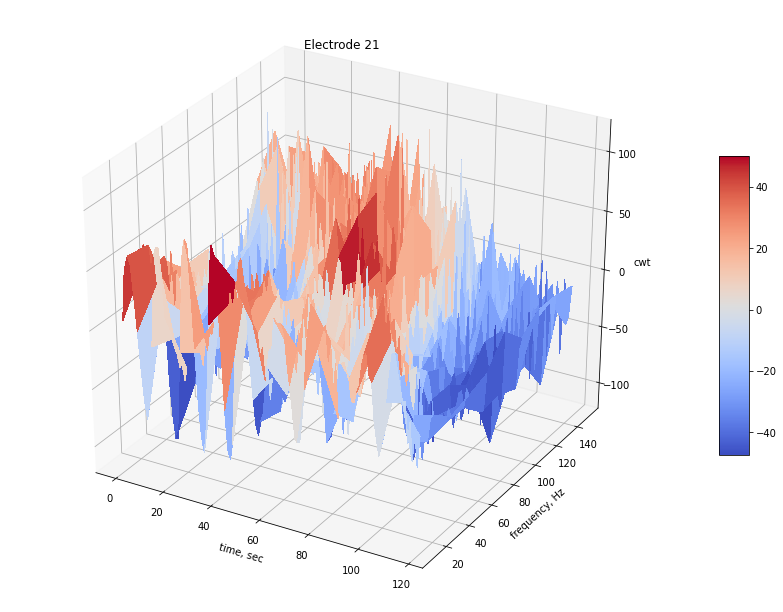

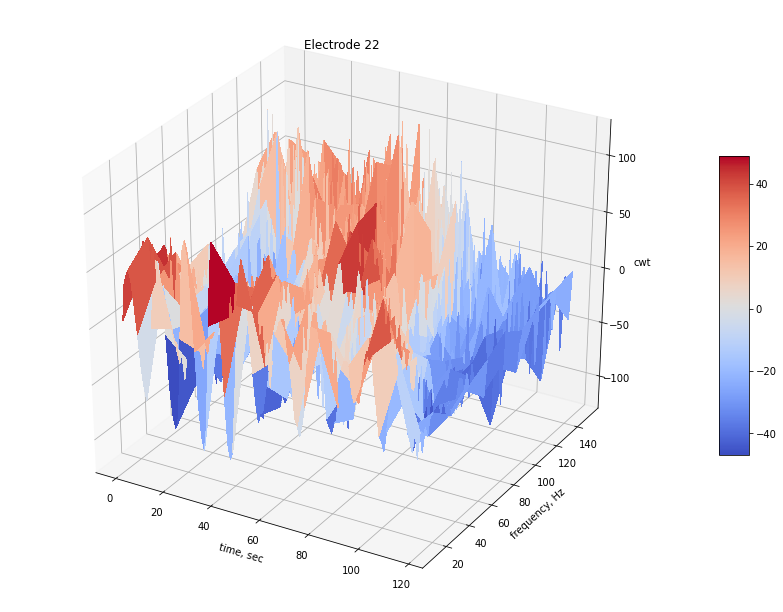

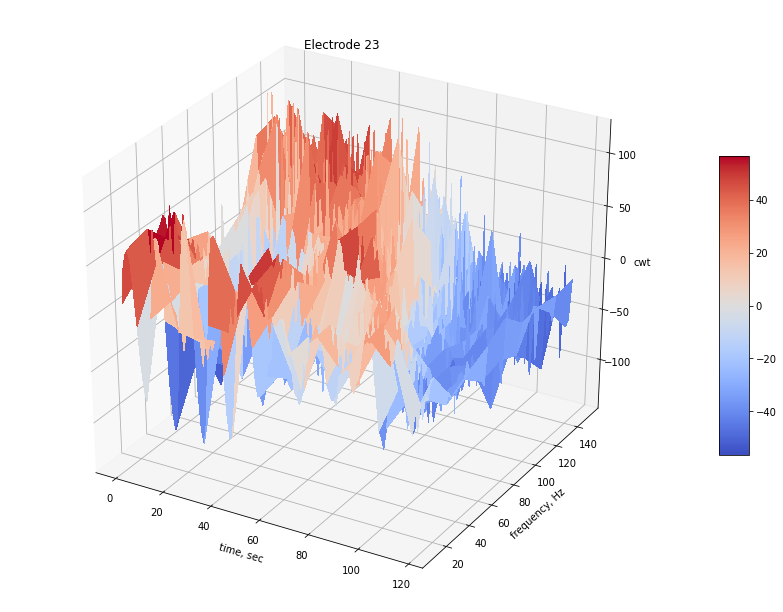

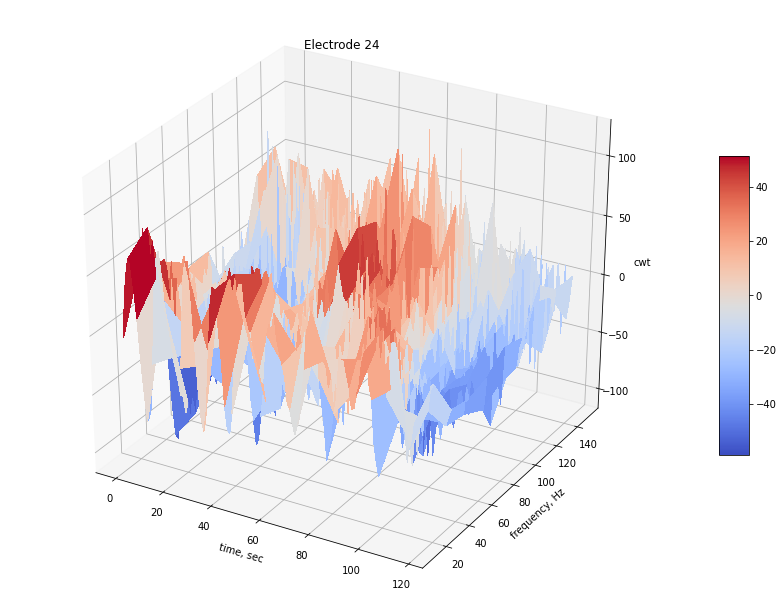

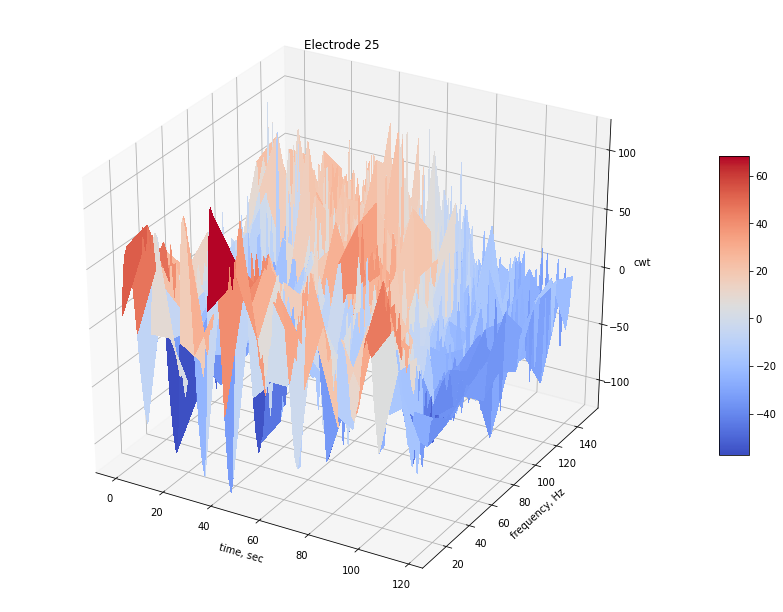

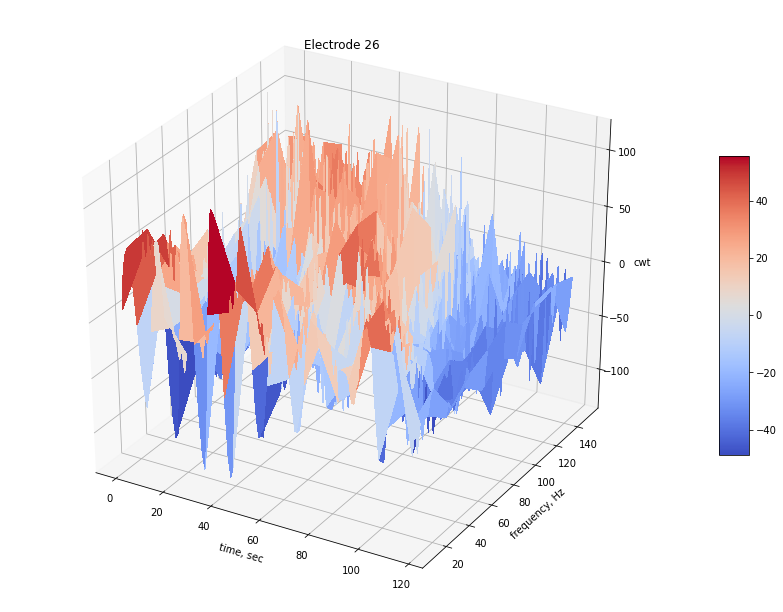

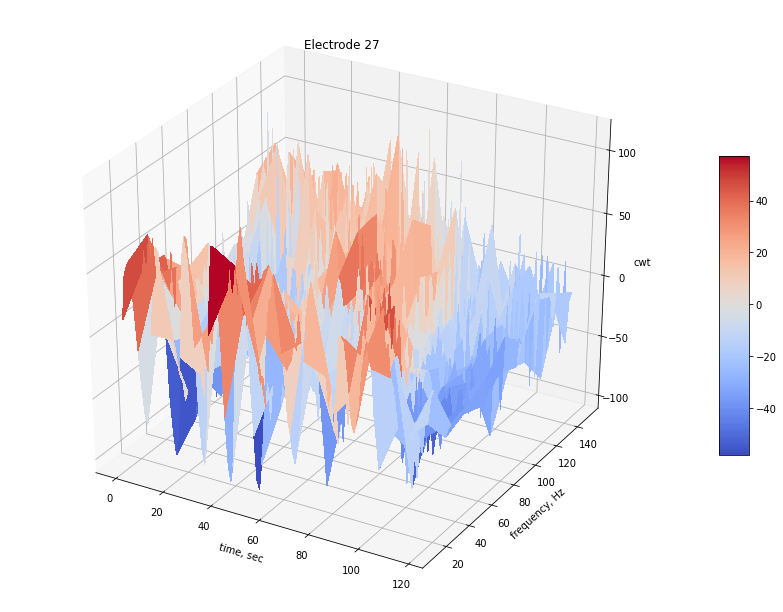

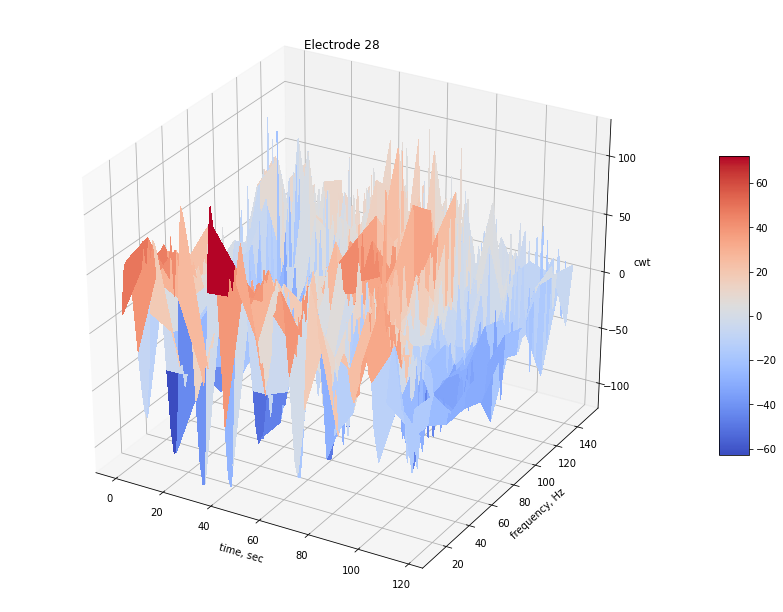

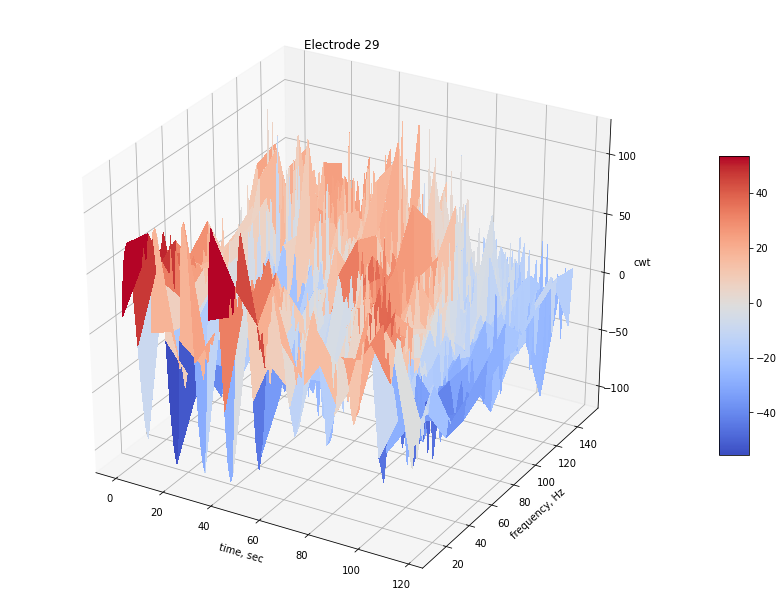

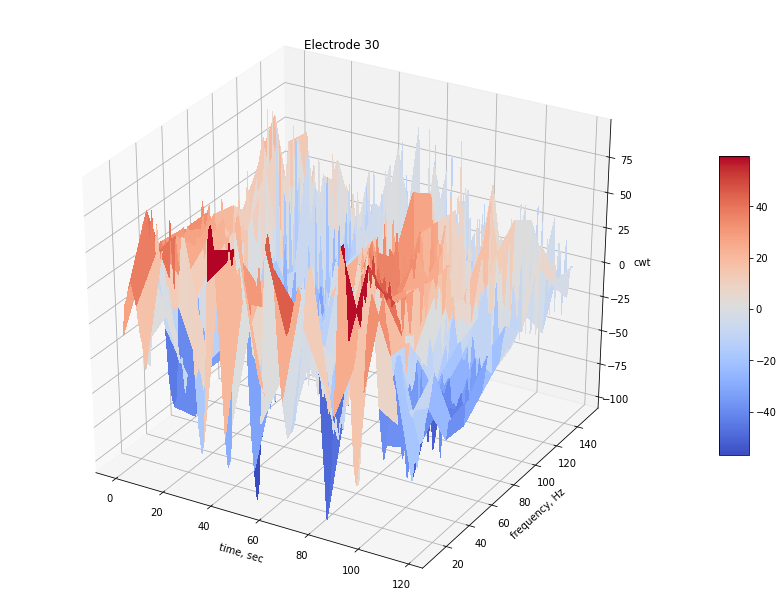

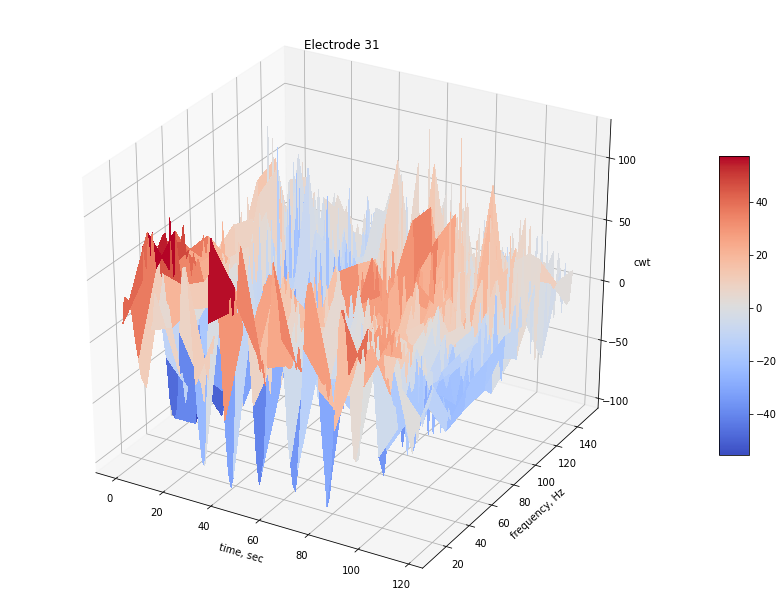

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

for el in range(data.signal.shape[1]):
    fig = plt.figure(figsize=(15, 11))
    ax = fig.gca(projection='3d')

    # Make data.
    Y = np.linspace(10, 150, 10)
    X = data.time[:120000:1000]
    Z = pywt.cwt(data.signal[:120000:1000, el], wavelet='morl', scales=Y)[0]
    X, Y = np.meshgrid(X, Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                          linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_xlabel('time, sec')
    ax.set_ylabel('frequency, Hz')
    ax.set_zlabel('cwt')
    ax.set_title("Electrode "+str(el))
    #ax.set_zlim(-1.01, 1.01)
    #ax.zaxis.set_major_locator(LinearLocator(10))
    #ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=10)

    plt.show()

In [203]:
!pip install dtaidistance

     |████████████████████████████████| 757kB 12.3MB/s 
  Created wheel for dtaidistance: filename=dtaidistance-2.1.2-cp36-cp36m-linux_x86_64.whl size=1446283 sha256=ff01e851642a85be279809ad69ff2aacf8df5a50e1c68b7a500ef5ff6af35c41
  Stored in directory: /root/.cache/pip/wheels/d6/2c/9e/ed7ddb5538a7f3eab7b743e657f539260c46252c330ee0180e
Successfully built dtaidistance


In [36]:
data.

(50,)

(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f0be93d5f28>])

<Figure size 576x576 with 0 Axes>

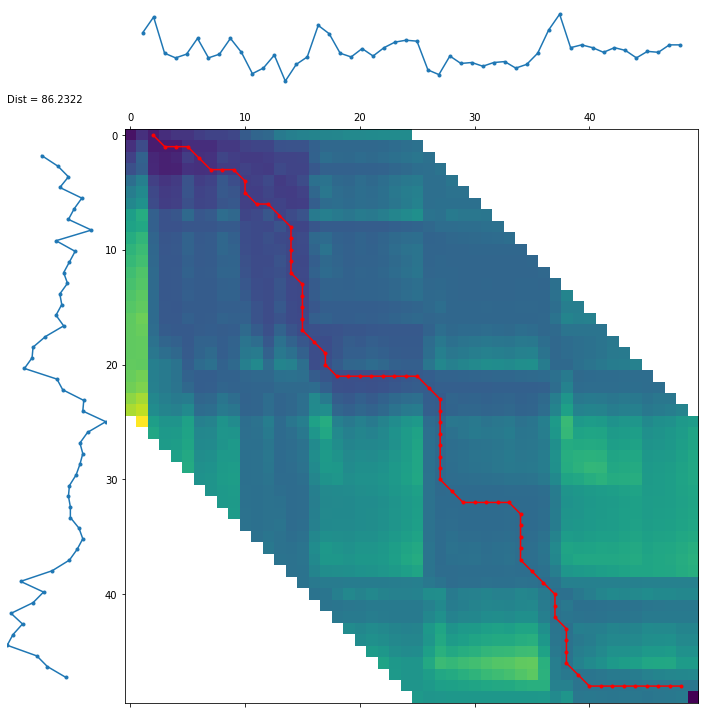

In [211]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import random
import numpy as np
f = plt.figure(figsize=(8,8))
s1 = data.signal[25000:30000:100, 2]
s2 = data.signal[35000:40000:100, 2]
#x = np.arange(0, 20, .5)
#s1 = np.sin(x)
#s2 = 3 * np.cos(x + 2)
#random.seed(1)
#for idx in range(len(s2)):
#    if random.random() < 0.05:
#        s2[idx] += (random.random() - 0.5) / 2
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

In [35]:
 best_path

[(0, 2),
 (1, 2),
 (2, 3),
 (2, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (5, 12),
 (6, 12),
 (7, 13),
 (7, 14),
 (8, 15),
 (9, 15),
 (10, 15),
 (11, 15),
 (12, 16),
 (13, 17),
 (14, 18),
 (14, 19),
 (15, 20),
 (16, 21),
 (17, 22),
 (18, 22),
 (19, 23),
 (20, 24),
 (21, 24),
 (22, 25),
 (23, 25),
 (24, 25),
 (25, 26),
 (25, 27),
 (26, 28),
 (26, 29),
 (26, 30),
 (26, 31),
 (26, 32),
 (26, 33),
 (27, 34),
 (28, 34),
 (29, 34),
 (30, 34),
 (31, 34),
 (32, 34),
 (33, 34),
 (34, 34),
 (35, 34),
 (36, 34),
 (37, 35),
 (38, 36),
 (39, 37),
 (40, 37),
 (41, 38),
 (42, 38),
 (43, 38),
 (44, 38),
 (45, 38),
 (46, 38),
 (47, 39),
 (47, 40),
 (47, 41),
 (47, 42),
 (47, 43),
 (47, 44),
 (47, 45),
 (48, 46),
 (48, 47),
 (48, 48)]

In [ ]:
paths.shape

(41, 41)

In [ ]:
d

0.28519174607993747